<a href="https://colab.research.google.com/github/harnalashok/databases/blob/main/3_Relational_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Last amended: 25th Dec, 2021
# Ref: https://www.cs.uct.ac.za/mit_notes/database/htmls/chp02.html#primary-key

# Database constraints

## Primary Key

### Formal definition
In the relational model of databases, a primary key is a specific choice of a *minimal set* of attributes (columns) that uniquely specify a tuple (row) in a relation (table). Informally, a primary key is "**which attributes identify a record**," and in simple cases constitute a single attribute: a unique ID.  

More formally, a primary key is a choice of candidate key (a minimal set of columns); any other candidate key is an **alternate key**.

Primary keys may consist of a single column, or a combination of columns. An example of a single table column would be the use of a unique employee number in a table containing information about employees.

#### Examples

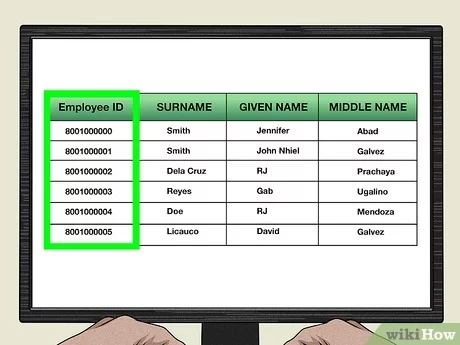

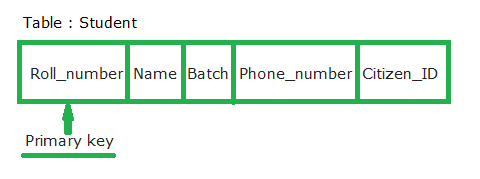

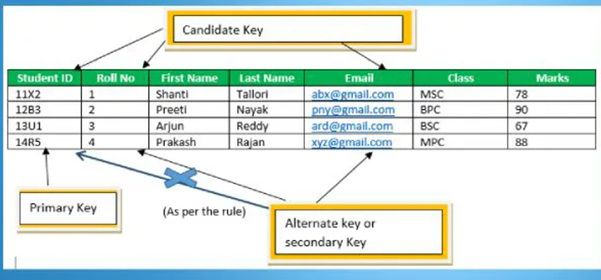

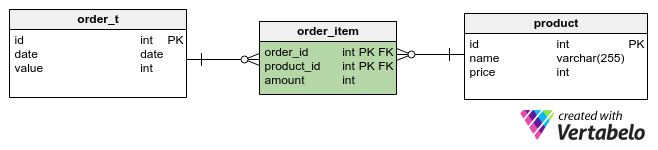

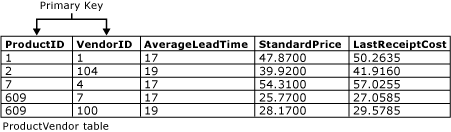

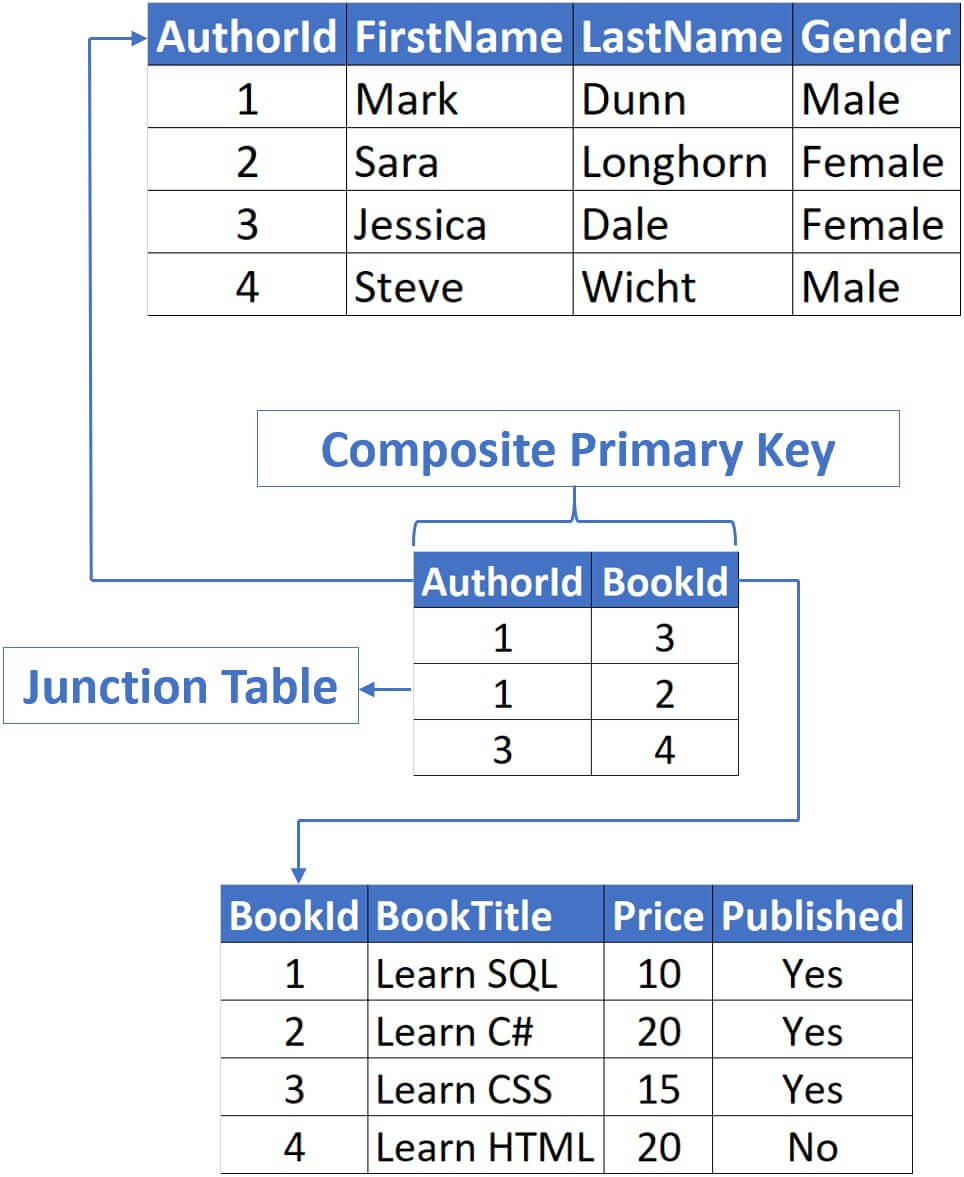

## Foreign key

A foreign key is a set of attributes in a table that refers to or matches the primary key of another table.  The foreign key links these two tables.

The table containing the foreign key is called the child table, and the table containing the candidate key is called the referenced or parent table.  

In database relational modeling and implementation, a candidate key is a set of zero or more attributes, the values of which are guaranteed to be unique for each tuple (row) in a relation. 

Since the purpose of the foreign key is to identify a particular row of referenced table, it is generally required that the foreign key is equal to the candidate key in some row of the primary table, or** else have no value (the NULL value**). This rule is called a referential integrity constraint between the two tables. Because violations of these constraints can be the source of many database problems, most database management systems provide mechanisms to ensure that every non-null foreign key corresponds to a row of the referenced table.

For example, consider a database with two tables: a CUSTOMER table that includes all customer data and an ORDER table that includes all customer orders. Suppose the business requires that each order must refer to a single customer. To reflect this in the database, a foreign key column is added to the ORDER table (e.g., CUSTOMERID), which references the primary key of CUSTOMER (e.g. ID). Because the primary key of a table must be unique, and because CUSTOMERID only contains values from that primary key field, we may assume that, when it has a value, CUSTOMERID will identify the particular customer which placed the order. However, this can no longer be assumed if the ORDER table is not kept up to date when rows of the CUSTOMER table are deleted or the ID column altered, and working with these tables may become more difficult. Many real world databases work around this problem by 'inactivating' rather than physically deleting master table foreign keys, or by complex update programs that modify all references to a foreign key when a change is needed.

Multiple rows in the referencing (or child) table may refer to the same row in the referenced (or parent) table. In this case, the relationship between the two tables is called a one to many relationship between the referencing table and the referenced table.

In addition, the child and parent table may, in fact, be the same table, i.e. the foreign key refers back to the same table. Such a foreign key is known as a self-referencing or recursive foreign key. In database management systems, this is often accomplished by linking a first and second reference to the same table.

A table may have multiple foreign keys, and each foreign key can have a different parent table. 

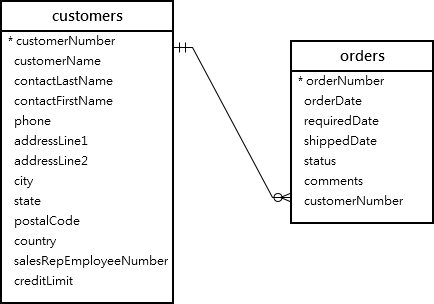

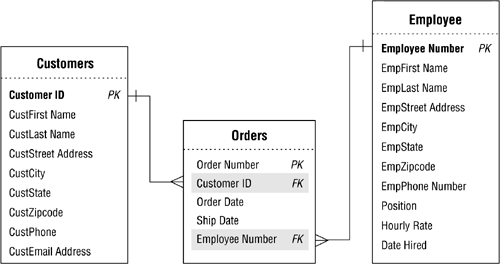

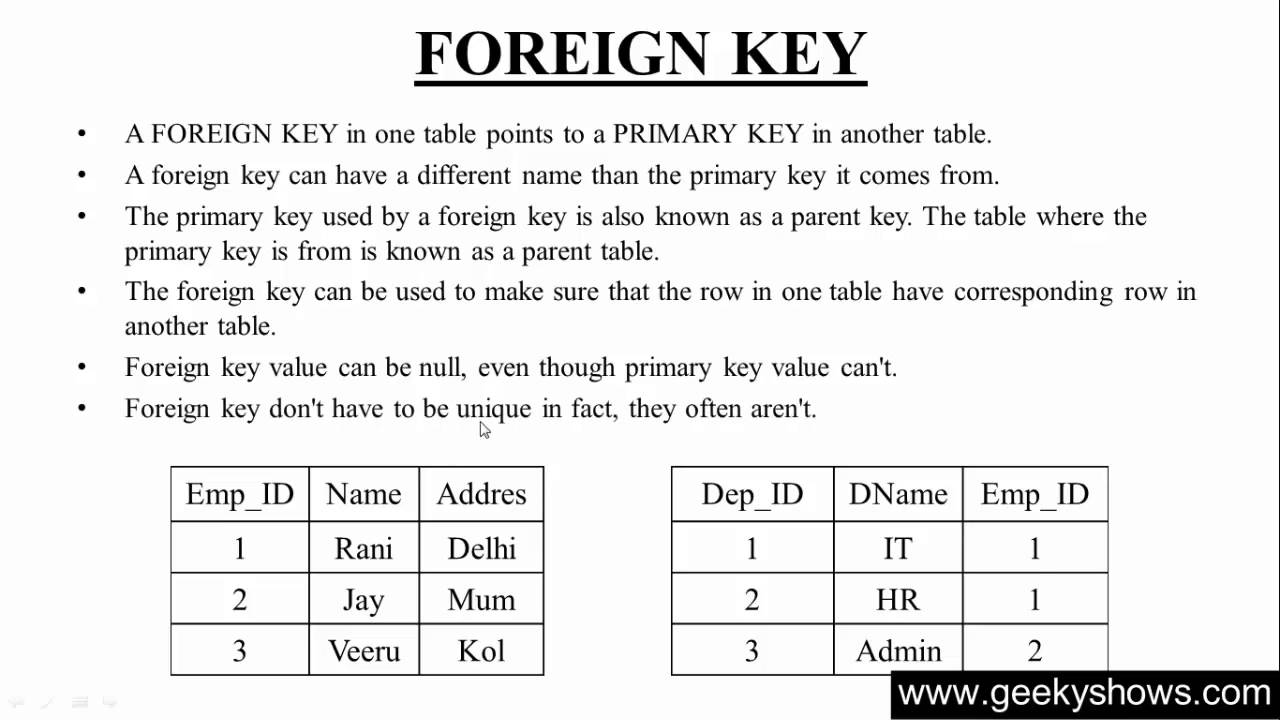

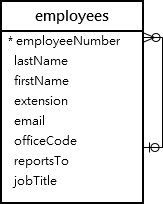

The <i>reportTo</i> column is a foreign key that refers to the employeeNumber column which is the primary key of the employees table.

## Integrity constraints

Data integrity is the maintenance of, and the assurance of, data accuracy and consistency over its entire life-cycle. Data integrity is normally enforced in a database system by a series of integrity constraints or rules.

### Null values

There is a standard means of representing information that is not currently known or unavailable within Relational database systems. We say that a column for which the value is not currently known, or for which a value is not applicable, is null. 

An important point to grasp about null values is that they are a very specific way of representing the fact that the data item in question literally is not currently set to any value at all.   

Prior to the use of null values, and still in some systems today, if it is desired to represent the fact that a data item is not currently set to some value, an alternative value such as 0, or a blank space, will be given to that data item. This is poor practice, as of course 0, or a blank space, are perfectly legitimate values in their own right. Use of null values overcomes this problem, in that null is a value whose meaning is simply that there is no value currently allocated to the data item in question.  

There are a number of situations in which the use of null values is appropriate. In general we use it to indicate that a data item currently has no value allocated to it. Examples of when this might happen are:  

>1. When the value of the data item is not yet known.<br>
>2. When the value for that data item is yet to be entered into the system.<br>
>3. When it is not appropriate that this particular instance of the data item is given a value.<br>

An example of this last situation might be where we are recording the details of employees in a table, including their salary and commission. We would store the salaries of employees in one table column, and the details of commission in another. Supposing that only certain employees, for example sales staff, are paid commission. This would mean that all employees who are not sales staff would have the value of their commission column set to null, indicating that they are not paid commission. The use of null in this situation enables us to represent the fact that some commissions are not set to any specific value, because it is not appropriate to pay commission to these staff.  

Another result of this characteristic of null values is that where two data items both contain null, if you compare them with one another in a query language, the system will not find them equal. Again, the logic behind this is that the fact that each data item is null does not mean they are equal, it simply means that they contain no value at all.

### Entity Integrity

Entity integrity is concerned with ensuring that each row of a table has a unique and non-null primary key value; this is the same as saying that each row in a table represents a single instance of the entity type modelled by the table.   

Consider for the moment the possibility of having null values in primary keys. What would be the consequences for the system?

Null values denote the fact that the data item is not currently set to any real value. Imagine, however, that two rows in a table are the same, apart from the fact that part of their primary keys are set to null. An attempt to test whether these two entity instances are the same will find them not equal, but is this really the case? No. 

What is really going on here is that the two entity instances are the same, other than the fact that a part of their primary keys are as yet unknown. Therefore, the occurrence of nulls in primary keys would stop us being able to compare entity instances. For this reason, the column or columns used to form a primary key are not allowed to contain null values. **This rule is known as the Entity Integrity Rule**, and is a part of the Relational theory that underpins the Relational model of data. The rule does not ensure that primary keys will be unique, but by not allowing null values to be included in primary keys, it does avoid a major source of confusion and failure of primary keys.

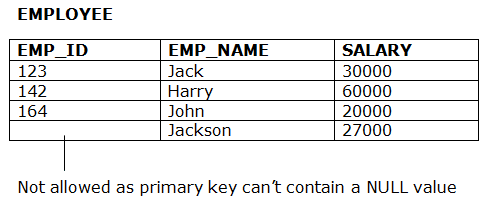

### Referential Integrity

Referential integrity concerns the concept of a foreign key. The referential integrity rule states that any foreign-key value can only be in one of two states. The usual state of affairs is that the foreign-key value refers to a primary key value of some table in the database. Occasionally, and this will depend on the rules of the data owner, a foreign-key value can be null. In this case, we are explicitly saying that either there is no relationship between the objects represented in the database or that this relationship is unknown.

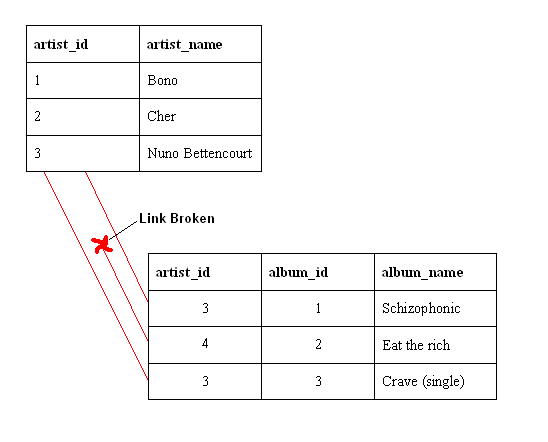

An example of a database that has not enforced referential integrity. In this example, there is a foreign key (artist_id) value in the album table that references a non-existent artist — in other words there is a foreign key value with no corresponding primary key value in the referenced table. What happened here was that there was an artist called "Aerosmith", with an artist_id of 4, which was deleted from the artist table. However, the album "Eat the Rich" referred to this artist. With referential integrity enforced, this would not have been possible.

### Domain Integrity

Domain integrity specifies that all columns in a relational database must be declared upon a defined domain. The primary unit of data in the relational data model is the data item. Such data items are said to be non-decomposable or atomic. A domain is a set of values of the same type. Domains are therefore pools of values from which actual values appearing in the columns of a table are drawn.

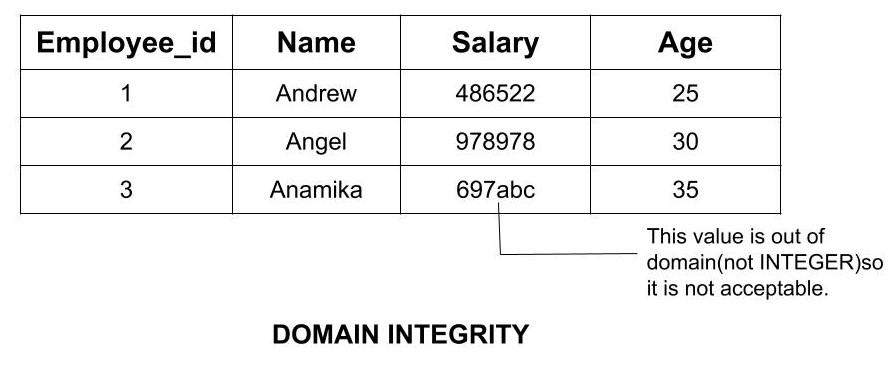

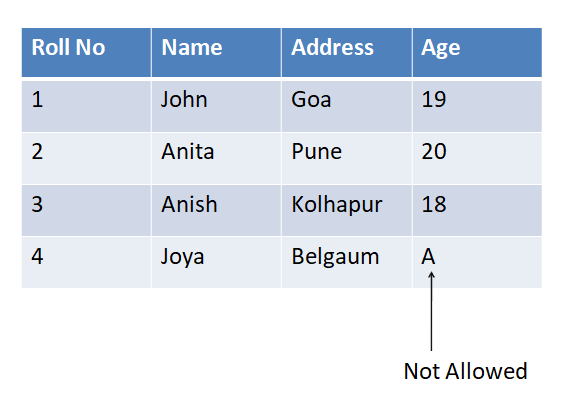

### General or Check or user constraints

These are additional rules specified by the users or database administrators of a database, which define or constrain some aspect of the enterprise. For example, a database administrator can contain the PROJECT_NAME column to have a maximum of 30 characters for each value inserted. For example, Age is numeric but can not be negative. Or Date cannot be a future century. Or, the range of values for a salary column can be limited by creating a CHECK constraint that allows values only from 3,000 to 10,000. 

In [ ]:
######### Done ###################